In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models, Sequential
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import ResNet50, VGG16
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, ReLU, AveragePooling2D, add

# CIFAR-10 Dataset

In [ ]:
(cifar_xTrain, cifar_yTrain), (cifar_xTest, cifar_yTest) = datasets.cifar10.load_data()

In [ ]:
print('X Train Shape: ', cifar_xTrain.shape)
print('X Test Shape:  ', cifar_xTest.shape)
print('\nY Train Shape: ', cifar_yTrain.shape)
print('Y Test Shape:  ', cifar_yTest.shape)

X Train Shape:  (50000, 32, 32, 3)
X Test Shape:   (10000, 32, 32, 3)

Y Train Shape:  (50000, 1)
Y Test Shape:   (10000, 1)


In [ ]:
cifar_xTrain = cifar_xTrain.astype('float32') / 255.0
cifar_xTest = cifar_xTest.astype('float32') / 255.0

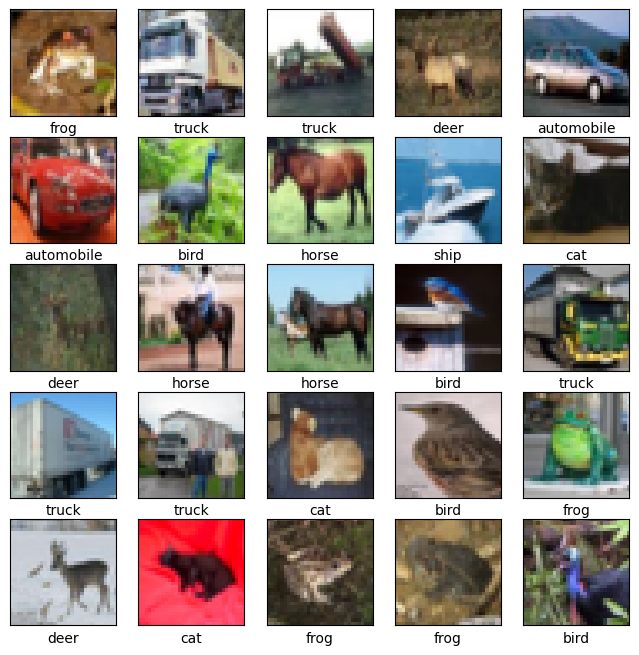

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_xTrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[cifar_yTrain[i][0]])
plt.show()

In [ ]:
cifar_yTrain = utils.to_categorical(cifar_yTrain)
cifar_yTest = utils.to_categorical(cifar_yTest)

## VGG-16 Architecutre on CIFAR-10 Dataset

In [ ]:
inputShape = (32,32,3)
inputLayer = Input(shape=inputShape, name='img_input')

In [ ]:
# Block 1
x = Conv2D(64, (3,3), padding='same', activation='relu', name='block1_conv1')(inputLayer)
x = Conv2D(64, (3,3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3,3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3,3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block5_pool')(x)

x = Flatten()(x)
# Fully Connected 1
x = Dense(4096, activation='relu')(x)

# Fully Connected 2
x = Dense(4096, activation='relu')(x)

# Output Layer (SoftMax)
outputLayer = Dense(10, activation='softmax')(x)

vgg_cifar = Model(inputs=inputLayer, outputs=outputLayer)

- Compile the model

In [ ]:
vgg_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_cifar.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

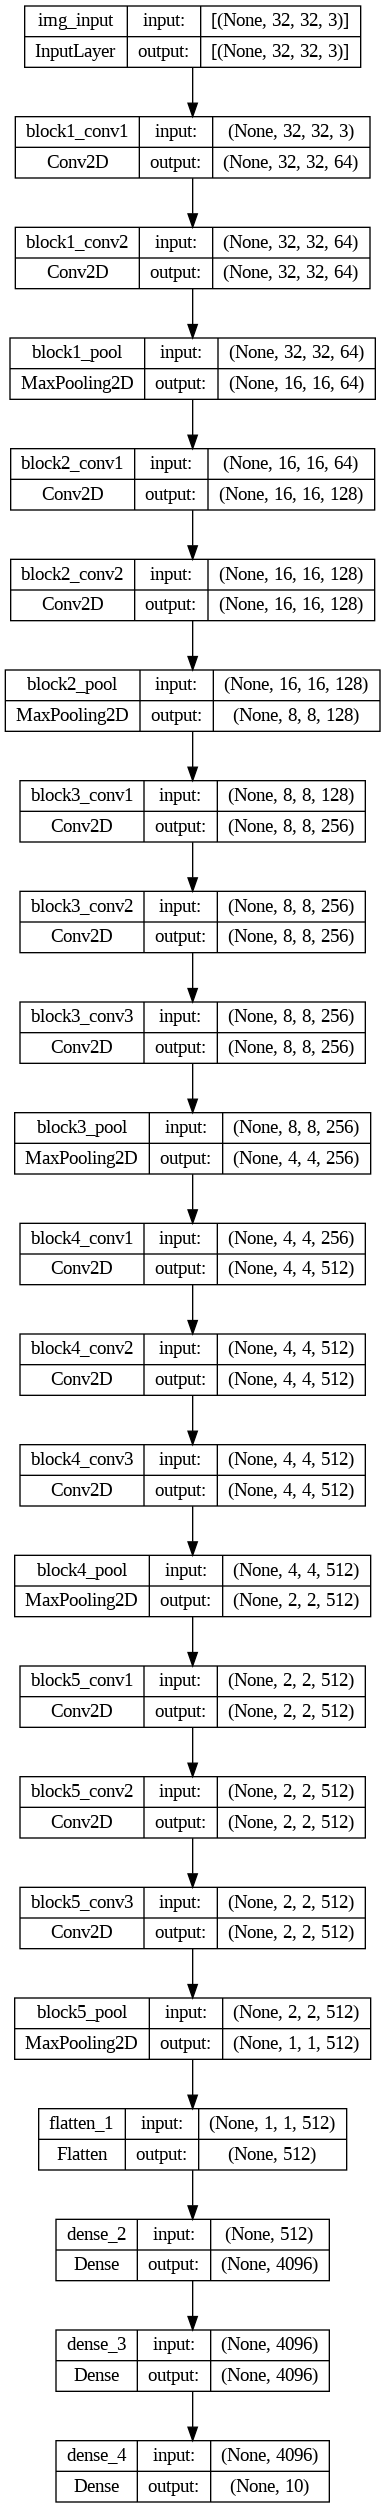

In [ ]:
plot_model(vgg_cifar, show_shapes=True, to_file='vgg_model_cifar10.png')

- Train Model

In [ ]:
vgg_cifar_history = vgg_cifar.fit(cifar_xTrain, cifar_yTrain, validation_data=(cifar_xTest, cifar_yTest), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 35ms/step - loss: 2.3029 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 -

- Make Predictions

In [ ]:
vgg_cifar_perdict = vgg_cifar.predict(cifar_xTest)

vgg_cifar_perdict = [np.argmax(arr) for arr in vgg_cifar_perdict]
print(np.array(vgg_cifar_perdict))

313/313 [==============================] - 3s 9ms/step
[0 0 0 ... 0 0 0]


In [ ]:
cifar_yTest = [np.argmax(arr) for arr in cifar_yTest]
print(np.array(cifar_yTest))

[0 0 0 ... 0 0 0]


- Evaluate Model

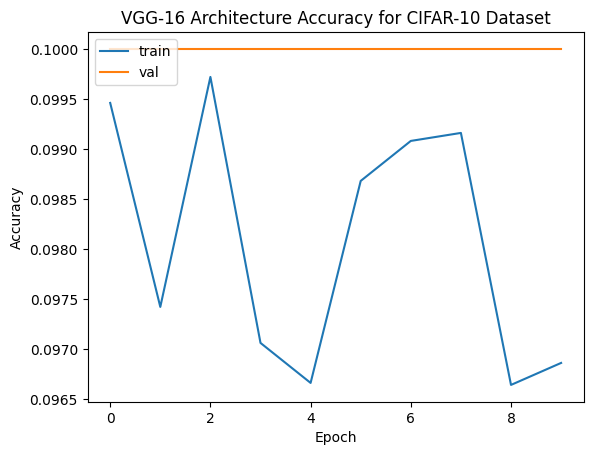

In [ ]:
plt.plot(vgg_cifar_history.history['accuracy'])
plt.plot(vgg_cifar_history.history['val_accuracy'])
plt.title('VGG-16 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

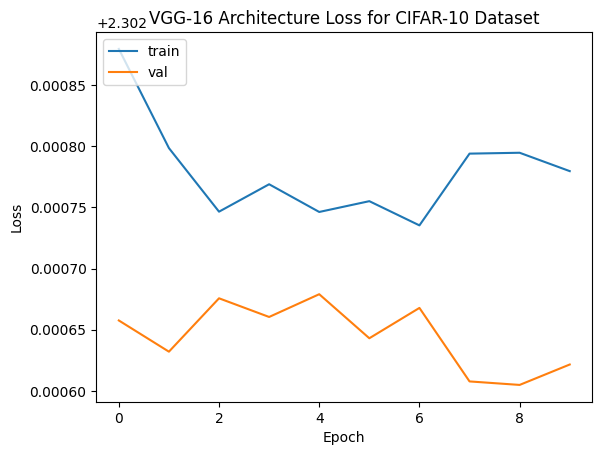

In [ ]:
plt.plot(vgg_cifar_history.history['loss'])
plt.plot(vgg_cifar_history.history['val_loss'])
plt.title('VGG-16 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(vgg_cifar_history.history['accuracy']) * 100, 2) , '%')

Accuracy Score = 9.97 %


- Confusion Matrix

In [ ]:
vgg_cifar_cm = confusion_matrix(cifar_yTest, vgg_cifar_perdict)

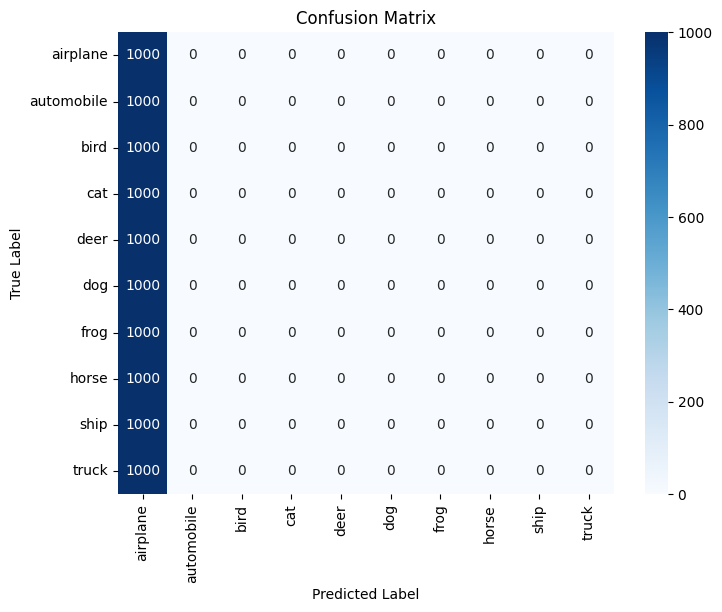

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(vgg_cifar_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Precision, recall, f1-score

In [ ]:
print(classification_report(cifar_yTest, vgg_cifar_perdict))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pretrained VGG-16 on CIFAR10

In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained VGG16
for layer in base_model.layers:
    layer.trainable = False

# Add additional layers for CIFAR-10 classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

pretrainedvggCifarModel = Model(inputs=base_model.input, outputs=output)

In [ ]:
pretrainedvggCifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrainedvggCifarModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

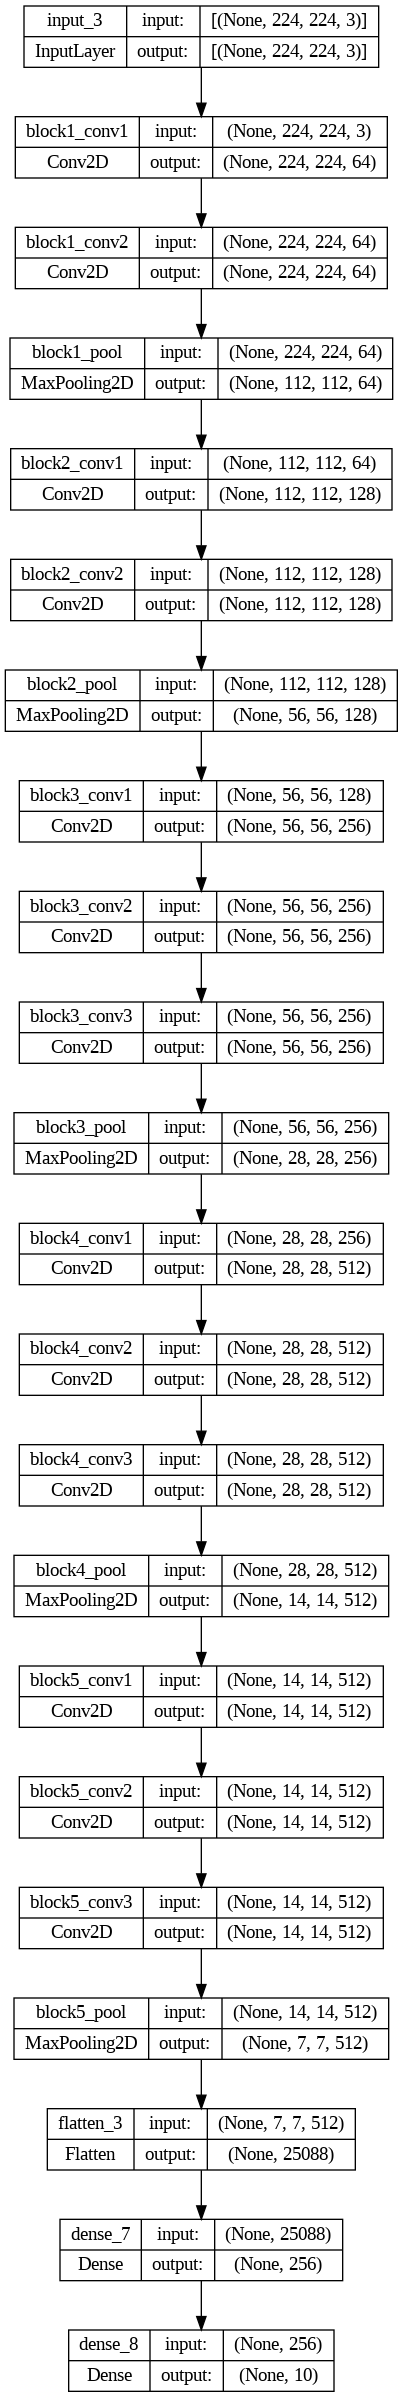

In [ ]:
plot_model(pretrainedvggCifarModel, show_shapes=True, to_file='pretrained_vgg_model_cifar10.png')

In [ ]:
x_train_resized = tf.image.resize(cifar_xTrain[:1000], (224, 224)).numpy()
x_test_resized = tf.image.resize(cifar_xTest[:1000], (224, 224)).numpy()

In [ ]:
pretrainedVggCifarHistory = pretrainedvggCifarModel.fit(x_train_resized, cifar_yTrain[:1000], epochs=10, validation_data=(x_test_resized, cifar_yTest[:1000]))

Epoch 1/10
32/32 [==============================] - 25s 377ms/step - loss: 3.0411 - accuracy: 0.2210 - val_loss: 1.9558 - val_accuracy: 0.2860
Epoch 2/10
32/32 [==============================] - 9s 299ms/step - loss: 1.5919 - accuracy: 0.4630 - val_loss: 1.6680 - val_accuracy: 0.4010
Epoch 3/10
32/32 [==============================] - 10s 303ms/step - loss: 1.2994 - accuracy: 0.5890 - val_loss: 1.6464 - val_accuracy: 0.3770
Epoch 4/10
32/32 [==============================] - 9s 299ms/step - loss: 1.0773 - accuracy: 0.6490 - val_loss: 1.4865 - val_accuracy: 0.5020
Epoch 5/10
32/32 [==============================] - 8s 264ms/step - loss: 0.8950 - accuracy: 0.7440 - val_loss: 1.3977 - val_accuracy: 0.5140
Epoch 6/10
32/32 [==============================] - 9s 295ms/step - loss: 0.7991 - accuracy: 0.7700 - val_loss: 1.4012 - val_accuracy: 0.5150
Epoch 7/10
32/32 [==============================] - 9s 294ms/step - loss: 0.6929 - accuracy: 0.8000 - val_loss: 1.4764 - val_accuracy: 0.4860
Epoc

In [ ]:
pretrainedVggCifarPerdict = pretrainedvggCifarModel.predict(x_test_resized)

pretrainedVggCifarPerdict = [np.argmax(arr) for arr in pretrainedVggCifarPerdict]
print(np.array(pretrainedVggCifarPerdict))

32/32 [==============================] - 5s 135ms/step
[9 8 3 1 6 6 1 4 4 1 4 9 3 7 9 6 5 5 8 6 7 0 4 9 4 2 4 2 9 6 2 4 4 3 9 4 7
 1 9 3 0 6 4 6 8 9 3 9 7 4 9 8 6 3 8 8 7 8 3 3 7 3 1 9 6 6 1 0 3 7 3 3 8 8
 9 2 9 3 3 8 8 9 1 7 2 4 7 4 8 9 0 3 8 6 4 6 6 8 0 1 4 7 5 3 9 1 2 6 8 5 4
 0 2 2 1 9 4 4 4 7 8 4 1 2 8 8 8 3 4 6 4 1 9 9 3 2 9 7 5 8 3 5 6 3 0 4 4 5
 5 3 0 1 3 9 8 3 2 9 3 8 2 1 5 6 0 7 8 4 2 0 9 9 3 8 9 9 8 7 3 9 3 5 2 4 7
 8 4 3 7 8 6 3 9 1 5 4 9 3 5 3 7 8 8 7 3 3 0 4 7 9 3 9 5 9 1 0 0 9 0 7 7 3
 9 4 3 9 4 2 3 4 5 1 5 1 8 0 4 9 9 5 1 9 8 9 0 5 0 8 4 1 3 5 9 8 2 3 6 0 8
 1 3 1 3 3 8 8 3 4 7 2 3 9 6 3 8 7 1 4 4 7 9 0 6 1 8 9 1 8 7 9 1 2 6 9 3 4
 6 0 0 6 3 6 4 1 4 8 9 4 9 4 8 6 8 0 3 0 4 7 5 4 4 3 4 3 7 7 7 5 3 6 1 9 3
 6 6 1 3 8 0 7 7 6 2 1 8 5 4 4 8 9 9 3 8 2 3 7 4 2 1 0 9 4 8 4 9 0 4 3 8 1
 3 0 9 4 2 7 9 4 4 6 6 4 0 1 5 0 4 4 3 5 1 2 4 5 9 6 3 3 8 3 9 1 7 8 8 4 0
 1 8 3 7 0 5 1 1 9 7 4 5 4 4 5 8 8 4 9 3 5 6 6 3 4 3 7 9 7 3 3 5 1 1 4 9 8
 3 7 4 0 5 0 1 9 7 3 9 0 4 4 3 8 7 6 1 4 3 4 

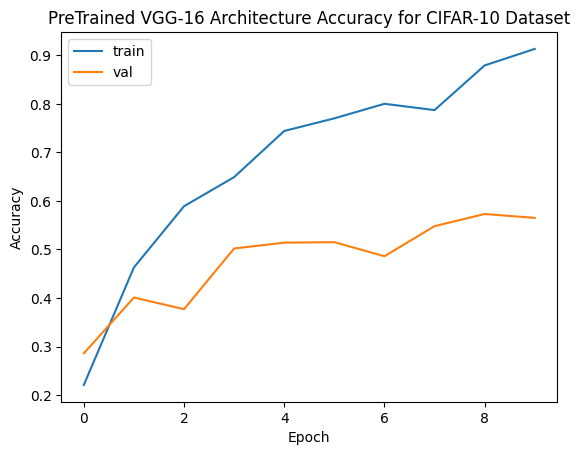

In [ ]:
plt.plot(pretrainedVggCifarHistory.history['accuracy'])
plt.plot(pretrainedVggCifarHistory.history['val_accuracy'])
plt.title('PreTrained VGG-16 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

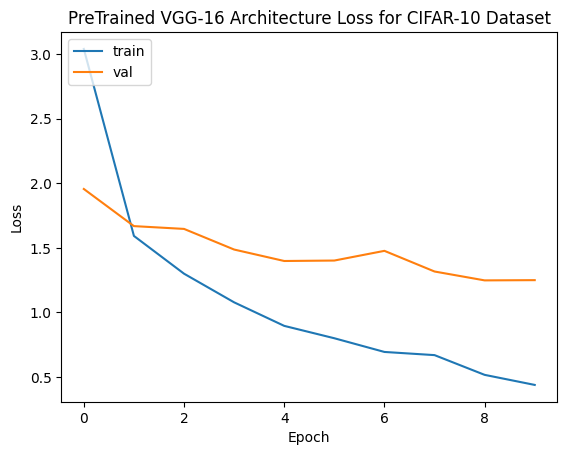

In [ ]:
plt.plot(pretrainedVggCifarHistory.history['loss'])
plt.plot(pretrainedVggCifarHistory.history['val_loss'])
plt.title('PreTrained VGG-16 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(pretrainedVggCifarHistory.history['accuracy']) * 100, 2) , '%')

Accuracy Score = 91.3 %


## ResNet-50 On CIFAR10 Dataset

In [ ]:
def identity_block(x, filters, stage, block):
    conv_name_base = 'res_' + block + '_branch'
    bn_name_base = 'bn_' + block + '_branch'

    x_shortcut = x

    # First component of main path
    x = layers.Conv2D(filters, (1, 1), name=conv_name_base + '2a')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    # Second component of main path
    x = layers.Conv2D(filters, (3, 3), padding='same', name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    # Third component of main path
    x = layers.Conv2D(filters, (1, 1), name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2c')(x)

    # Adjust shortcut dimension if needed
    if x_shortcut.shape[-1] != filters:
        x_shortcut = layers.Conv2D(filters, (1, 1), name=conv_name_base + '1')(x_shortcut)
        x_shortcut = layers.BatchNormalization(name=bn_name_base + '1')(x_shortcut)

    # Add shortcut value to main path
    x = layers.add([x, x_shortcut])
    x = layers.Activation('relu')(x)

    return x

In [ ]:
def resnet_block(x, filters, blocks, block_name):
    for i in range(blocks):
        x = identity_block(x, filters, stage=i, block=block_name + '_b' + str(i + 1))
    return x

In [ ]:
def build_resnet50(input_shape):
    input_tensor = tf.keras.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # ResNet blocks
    x = resnet_block(x, 64, 3, block_name='block1')
    x = resnet_block(x, 128, 4, block_name='block2')
    x = resnet_block(x, 256, 6, block_name='block3')
    x = resnet_block(x, 512, 3, block_name='block4')

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='resnet50')
    return model

In [ ]:
# Build the model
input_shape = cifar_xTrain.shape[1:]
resnet_cifar = build_resnet50(input_shape)

In [ ]:
resnet_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_cifar.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 16, 16, 64)           0         ['batch_normalization[0

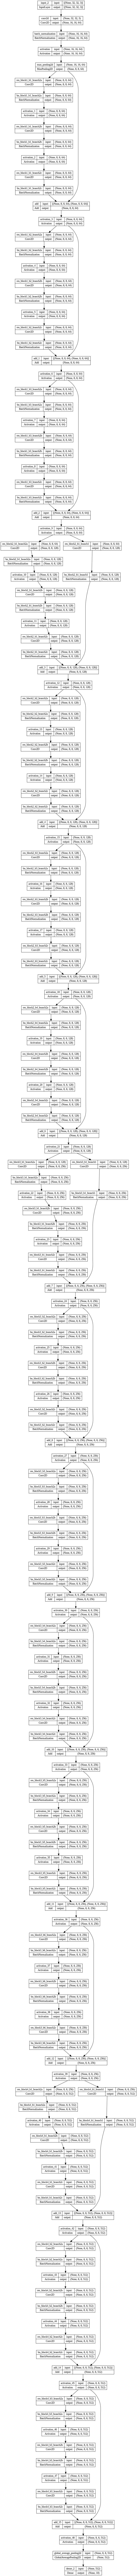

In [ ]:
plot_model(resnet_cifar, show_shapes=True, to_file='resnet50_model_cifar10.png')

In [ ]:
resnet_cifar_history = resnet_cifar.fit(cifar_xTrain, cifar_yTrain, validation_data=(cifar_xTest, cifar_yTest), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 128s 58ms/step - loss: 1.4857 - accuracy: 0.4635 - val_loss: 1.8284 - val_accuracy: 0.4177
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.0730 - accuracy: 0.6173 - val_loss: 1.6501 - val_accuracy: 0.4527
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8701 - accuracy: 0.6969 - val_loss: 1.0736 - val_accuracy: 0.6331
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7437 - accuracy: 0.7418 - val_loss: 1.1134 - val_accuracy: 0.6443
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6517 - accuracy: 0.7744 - val_loss: 0.8287 - val_accuracy: 0.7205
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.5746 - accuracy: 0.7999 - val_loss: 0.9048 - val_accuracy: 0.7042
Epoch 7/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.5130 - accuracy: 0.8207 - val_loss: 1.0453

In [ ]:
resnet_cifar_perdict = resnet_cifar.predict(cifar_xTest)

resnet_cifar_perdict = [np.argmax(arr) for arr in resnet_cifar_perdict]
print(np.array(resnet_cifar_perdict))

313/313 [==============================] - 5s 14ms/step
[3 8 8 ... 5 1 7]


In [ ]:
cifar_yTest = [np.argmax(arr) for arr in cifar_yTest]
print(np.array(cifar_yTest))

[3 8 8 ... 5 1 7]


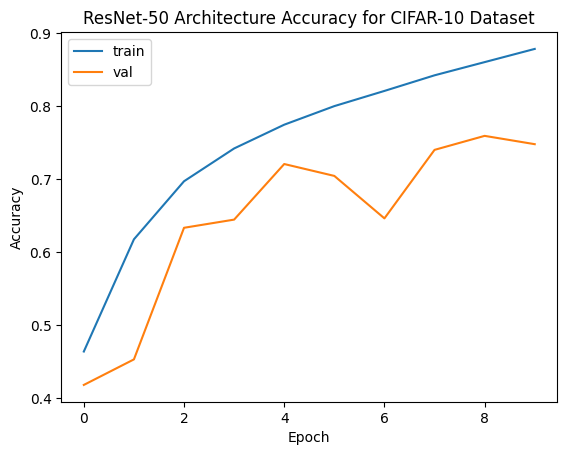

In [ ]:
plt.plot(resnet_cifar_history.history['accuracy'])
plt.plot(resnet_cifar_history.history['val_accuracy'])
plt.title('ResNet-50 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

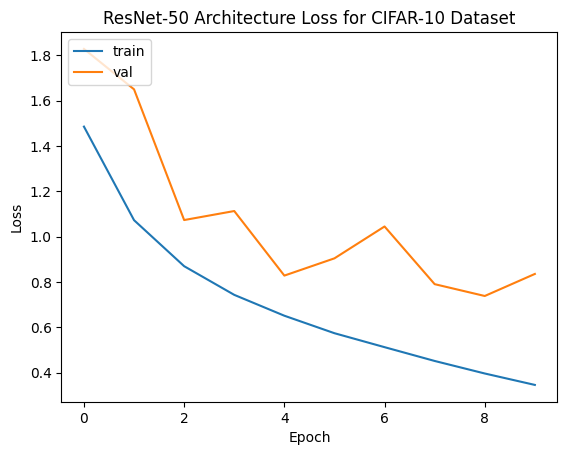

In [ ]:
plt.plot(resnet_cifar_history.history['loss'])
plt.plot(resnet_cifar_history.history['val_loss'])
plt.title('ResNet-50 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(resnet_cifar_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 75.91 %


In [ ]:
resnet_cifar_cm = confusion_matrix(cifar_yTest, resnet_cifar_perdict)
resnet_cifar_cm

array([[808,  18,  20,  13,   2,   0,   6,   4,  93,  36],
       [  9, 906,   0,   1,   0,   0,   2,   0,  34,  48],
       [ 89,  16, 619,  30,  60,  46,  56,  33,  35,  16],
       [ 57,  38,  44, 523,  50,  83,  54,  46,  47,  58],
       [ 66,  13,  26,  34, 687,  18,  36,  73,  25,  22],
       [ 24,  42,  33, 122,  33, 554,  28,  68,  43,  53],
       [ 14,  16,  24,  35,  19,  16, 802,   6,  41,  27],
       [ 47,  27,  11,  17,  24,  21,   5, 815,  12,  21],
       [ 37,  16,   3,   1,   1,   0,   0,   2, 921,  19],
       [ 17,  90,   1,   2,   2,   1,   0,   3,  42, 842]])

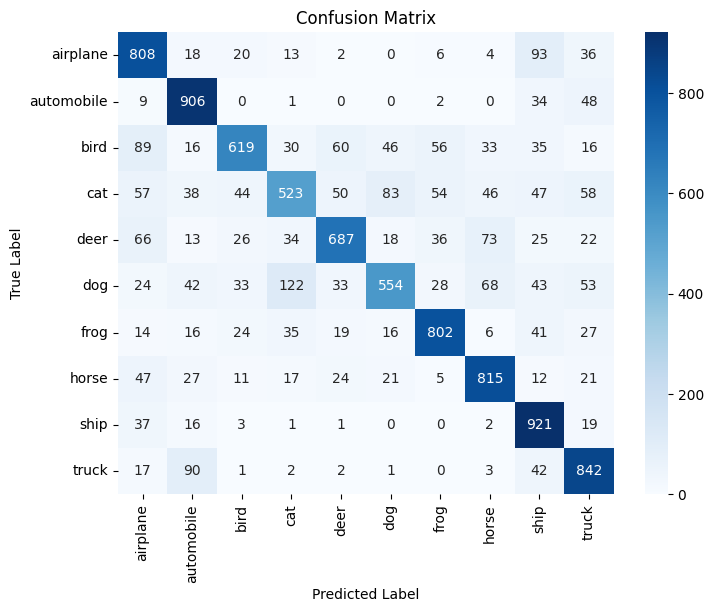

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(resnet_cifar_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(cifar_yTest, resnet_cifar_perdict))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1000
           1       0.77      0.91      0.83      1000
           2       0.79      0.62      0.70      1000
           3       0.67      0.52      0.59      1000
           4       0.78      0.69      0.73      1000
           5       0.75      0.55      0.64      1000
           6       0.81      0.80      0.81      1000
           7       0.78      0.81      0.80      1000
           8       0.71      0.92      0.80      1000
           9       0.74      0.84      0.79      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



## Pretrained ResNet-50 on CIFAR10 Dataset

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

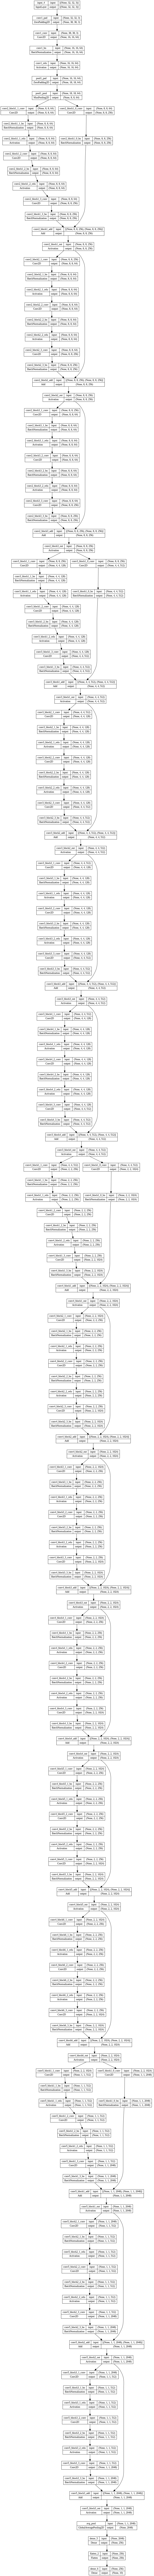

In [ ]:
input_tensor = Input(shape=(32, 32, 3))

pretrainedResnetCifar = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor, input_shape=(32, 32, 3), pooling='avg')

# Freeze the layers of the pre-trained ResNet-50
for layer in pretrainedResnetCifar.layers:
    layer.trainable = False

# Add additional layers for CIFAR-10 classification
x = Dense(256, activation='relu')(pretrainedResnetCifar.output)
x = Flatten()(x)
output = Dense(10, activation='softmax')(x)

# Create the final model
resnetCifarModel = Model(inputs=input_tensor, outputs=output)

# Compile the model
resnetCifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnetCifarModel.summary()
plot_model(resnetCifarModel, show_shapes=True, to_file='pretrained_resnet50_model_cifar10.png')

In [ ]:
pretrainedResnetCifarHistory = resnetCifarModel.fit(cifar_xTrain, cifar_yTrain, epochs=10, validation_data=(cifar_xTest, cifar_yTest))

Epoch 1/10
1563/1563 [==============================] - 60s 17ms/step - loss: 2.0320 - accuracy: 0.2611 - val_loss: 1.9187 - val_accuracy: 0.2846
Epoch 2/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.8776 - accuracy: 0.3164 - val_loss: 1.8093 - val_accuracy: 0.3554
Epoch 3/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.8154 - accuracy: 0.3423 - val_loss: 1.8396 - val_accuracy: 0.3421
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.7860 - accuracy: 0.3543 - val_loss: 1.7510 - val_accuracy: 0.3732
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7597 - accuracy: 0.3654 - val_loss: 1.7905 - val_accuracy: 0.3475
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7450 - accuracy: 0.3720 - val_loss: 1.7582 - val_accuracy: 0.3653
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7251 - accuracy: 0.3793 - val_loss: 1.7236 -

In [ ]:
resnet_cifar_perdict = resnetCifarModel.predict(cifar_xTest)

resnet_cifar_perdict = [np.argmax(arr) for arr in resnet_cifar_perdict]
print(np.array(resnet_cifar_perdict))

313/313 [==============================] - 4s 9ms/step
[5 8 8 ... 5 5 7]


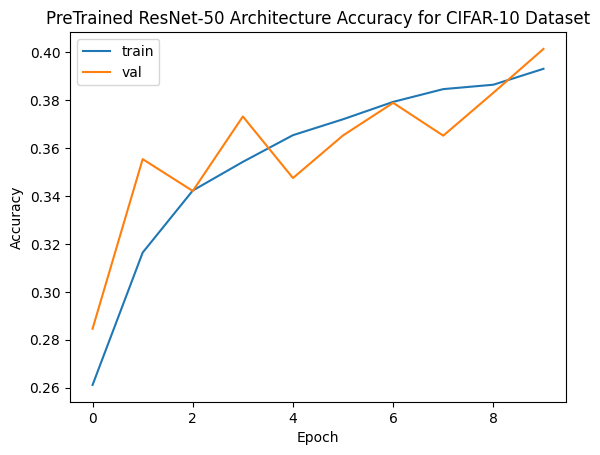

In [ ]:
plt.plot(pretrainedResnetCifarHistory.history['accuracy'])
plt.plot(pretrainedResnetCifarHistory.history['val_accuracy'])
plt.title('PreTrained ResNet-50 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

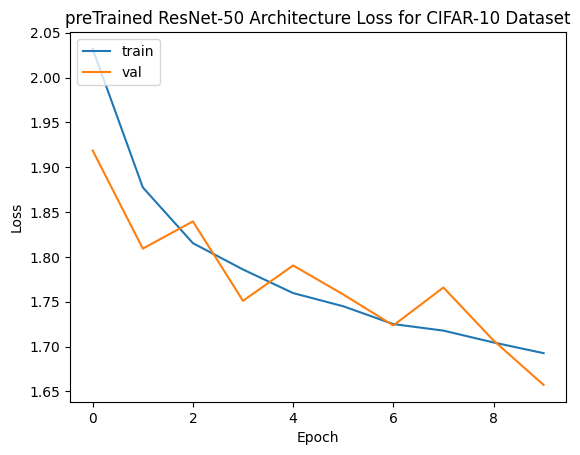

In [ ]:
plt.plot(pretrainedResnetCifarHistory.history['loss'])
plt.plot(pretrainedResnetCifarHistory.history['val_loss'])
plt.title('preTrained ResNet-50 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(pretrainedResnetCifarHistory.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 40.14 %


# MNIST Dataset

In [ ]:
(mnist_xTrain, mnist_yTrain), (mnist_xTest, mnist_yTest) = datasets.mnist.load_data()

In [ ]:
print('X Train Shape: ', mnist_xTrain.shape)
print('X Test Shape:  ', mnist_xTest.shape)
print('\nY Train Shape: ', mnist_yTrain.shape)
print('Y Test Shape:  ', mnist_yTest.shape)

X Train Shape:  (60000, 28, 28)
X Test Shape:   (10000, 28, 28)

Y Train Shape:  (60000,)
Y Test Shape:   (10000,)


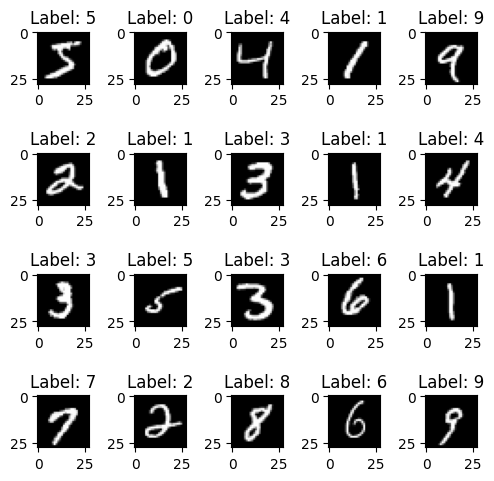

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(5, 5))
axs = axs.flatten()

for i in range(20):
    img = mnist_xTrain[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title("Label: {}".format(mnist_yTrain[i]))

plt.tight_layout()
plt.show()

In [ ]:
mnist_yTrain = utils.to_categorical(mnist_yTrain)
mnist_yTest = utils.to_categorical(mnist_yTest)

## VGG-16 Architecutre on MNIST Dataset

In [ ]:
from keras.layers import GlobalAveragePooling2D

input_layer = Input(shape=(28, 28, 1))

# Block 1
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(input_layer)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully Connected 1
x = Dense(256, activation='relu')(x)

# Fully Connected 2
x = Dense(256, activation='relu')(x)

# Output Layer (SoftMax)
outputLayer = Dense(10, activation='softmax')(x)

vgg_mnist = Model(inputs=input_layer, outputs=outputLayer)

- Compile the model

In [ ]:
vgg_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 28, 28, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 14, 14, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 14, 14, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 7, 7, 128)         0   

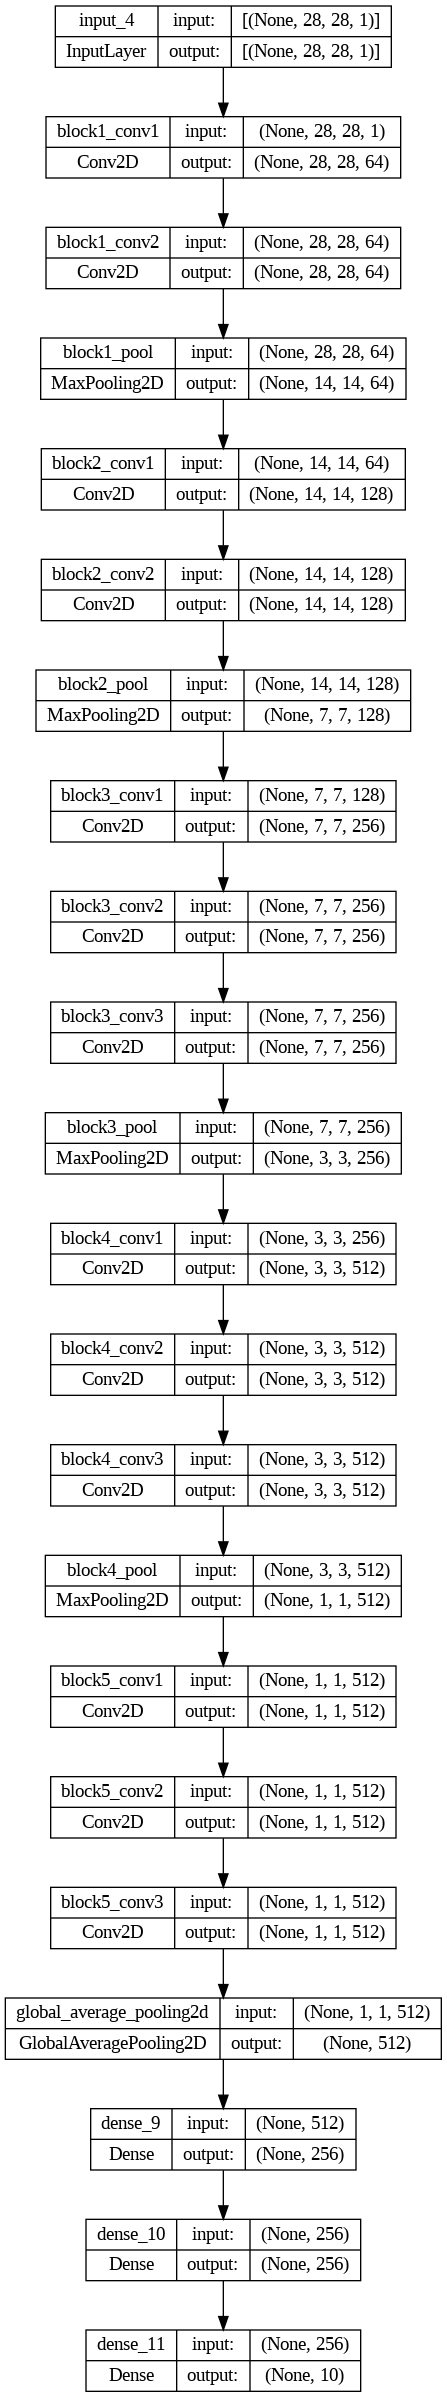

In [ ]:
vgg_mnist.summary()
plot_model(vgg_mnist, show_shapes=True, to_file='vgg_model_mnist.png')

- Train Model

In [ ]:
vgg_mnist_history = vgg_mnist.fit(mnist_xTrain, mnist_yTrain, validation_data=(mnist_xTest, mnist_yTest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 65s 30ms/step - loss: 0.4596 - accuracy: 0.8500 - val_loss: 0.1479 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1416 - accuracy: 0.9718 - val_loss: 0.0967 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1347 - accuracy: 0.9739 - val_loss: 0.0771 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0905 - accuracy: 0.9810 - val_loss: 0.0726 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1096 - accuracy: 0.9787 - val_loss: 0.0520 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1270 - accuracy: 0.9757 - val_loss: 0.0745 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0785 - accuracy: 0.9844 - val_loss: 0.0475 -

- Make Predictions

In [ ]:
vgg_mnist_perdict = vgg_mnist.predict(mnist_xTest)

vgg_mnist_perdict = [np.argmax(arr) for arr in vgg_mnist_perdict]
print(np.array(vgg_mnist_perdict))

313/313 [==============================] - 2s 6ms/step
[7 2 1 ... 4 5 6]


In [ ]:
mnist_yTest = [np.argmax(arr) for arr in mnist_yTest]
print(np.array(mnist_yTest))

[7 2 1 ... 4 5 6]


- Evaluate Model

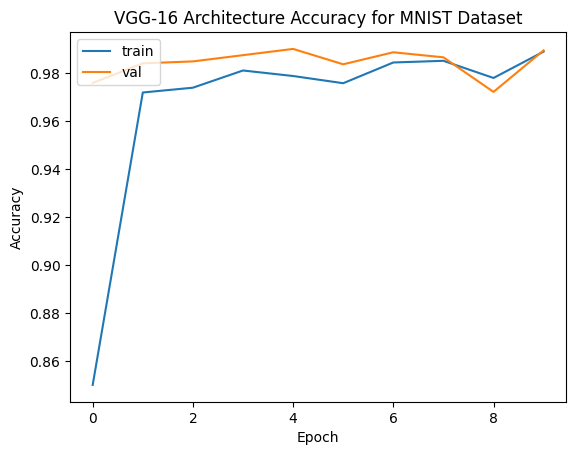

In [ ]:
plt.plot(vgg_mnist_history.history['accuracy'])
plt.plot(vgg_mnist_history.history['val_accuracy'])
plt.title('VGG-16 Architecture Accuracy for MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

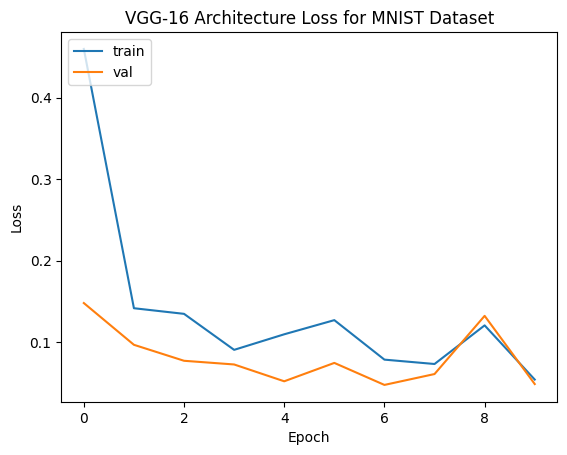

In [ ]:
plt.plot(vgg_mnist_history.history['loss'])
plt.plot(vgg_mnist_history.history['val_loss'])
plt.title('VGG-16 Architecture Loss for MNIST Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(vgg_mnist_history.history['accuracy']) * 100, 2) , '%')

Accuracy Score = 98.89 %


- Confusion Matrix

In [ ]:
label = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
vgg_mnist_cm = confusion_matrix(mnist_yTest, vgg_mnist_perdict)
vgg_mnist_cm

array([[ 975,    2,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    0,    0,    0,    0,    3,    0,    0,    0],
       [   0,    0, 1029,    0,    0,    0,    2,    1,    0,    0],
       [   0,    1,    3, 1003,    0,    1,    0,    2,    0,    0],
       [   0,    0,    0,    0,  976,    0,    3,    0,    1,    2],
       [   1,    0,    1,    8,    0,  877,    4,    0,    1,    0],
       [   2,    2,    0,    0,    0,    0,  947,    0,    7,    0],
       [   0,    7,    5,    0,    6,    0,    0, 1008,    1,    1],
       [   1,    0,    0,    1,    1,    1,    0,    0,  968,    2],
       [   0,    1,    1,    1,   18,    3,    0,    3,    3,  979]])

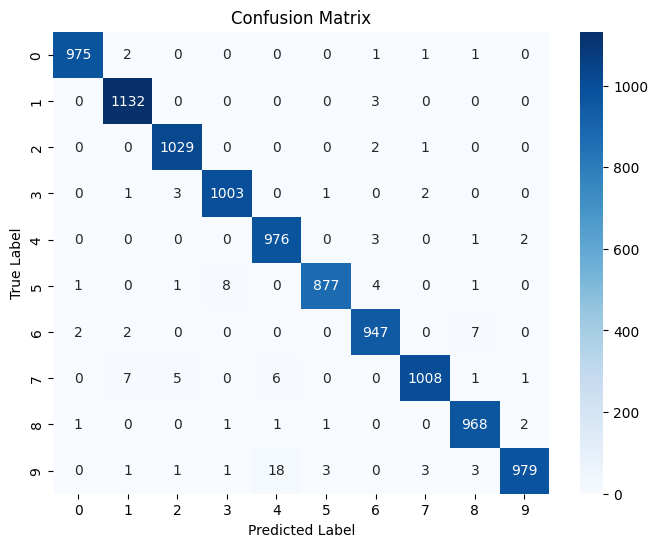

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(vgg_mnist_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Precision, recall, f1-score

In [ ]:
print(classification_report(mnist_yTest, vgg_mnist_perdict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Pretrained VGG-16 on MNIST Dataset

In [ ]:
x_train = np.dstack([mnist_xTrain] * 3)
x_test = np.dstack([mnist_xTest] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_vgg_model = models.Sequential()
pre_vgg_model.add(base_model)

# Flatten and add dense layers for MNIST classification
pre_vgg_model.add(layers.Flatten())
pre_vgg_model.add(layers.Dense(256, activation='relu'))
pre_vgg_model.add(layers.Dropout(0.5))
pre_vgg_model.add(layers.Dense(10, activation='softmax'))

x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])

pre_vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 14848586 (56.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pre_vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
pre_vgg_history = pre_vgg_model.fit(x_train, mnist_yTrain, epochs=10, validation_data=(x_test, mnist_yTest))

Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 82s 44ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 -

In [ ]:
pretrainedVggMnistPerdict = pre_vgg_model.predict(x_test)

pretrainedVggMnistPerdict = [np.argmax(arr) for arr in pretrainedVggMnistPerdict]
print(np.array(pretrainedVggMnistPerdict))

313/313 [==============================] - 4s 11ms/step
[1 1 1 ... 1 1 1]


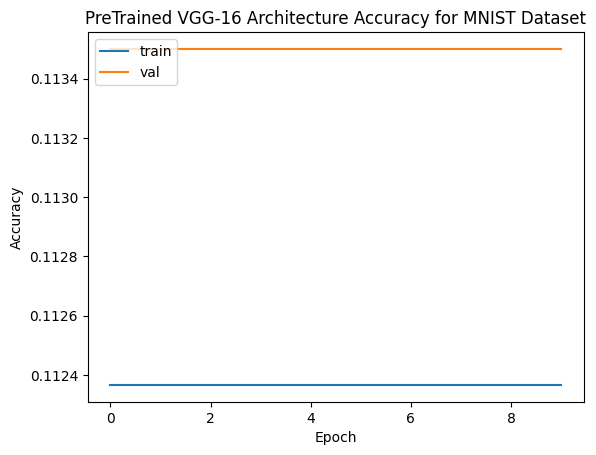

In [ ]:
plt.plot(pre_vgg_history.history['accuracy'])
plt.plot(pre_vgg_history.history['val_accuracy'])
plt.title('PreTrained VGG-16 Architecture Accuracy for MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

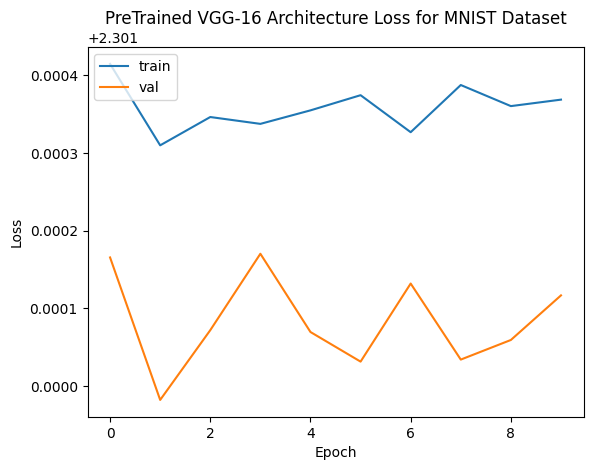

In [ ]:
plt.plot(pre_vgg_history.history['loss'])
plt.plot(pre_vgg_history.history['val_loss'])
plt.title('PreTrained VGG-16 Architecture Loss for MNIST Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(pre_vgg_history.history['accuracy']) * 100, 2) , '%')

Accuracy Score = 11.24 %


## ResNet-50 on MNIST Dataset

In [ ]:
x_train = np.dstack([mnist_xTrain] * 3)
x_test = np.dstack([mnist_xTest] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

In [ ]:
input_shape = x_train.shape[1:]
resnet_mnist = build_resnet50(input_shape)

In [ ]:
resnet_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_mnist.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 14, 14, 64)           9472      ['input_8[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 14, 14, 64)           256       ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_49 (Activation)  (None, 14, 14, 64)           0         ['batch_normalization_1

In [ ]:
resnet_mnist_history = resnet_mnist.fit(x_train, mnist_yTrain, validation_data=(x_test, mnist_yTest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 197s 76ms/step - loss: 0.2247 - accuracy: 0.9317 - val_loss: 0.0846 - val_accuracy: 0.9731
Epoch 2/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.1167 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0481 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.1187 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0406

In [ ]:
resnet_mnist_perdict = resnet_mnist.predict(x_test)

resnet_mnist_perdict = [np.argmax(arr) for arr in resnet_mnist_perdict]
print(np.array(resnet_mnist_perdict))

313/313 [==============================] - 5s 14ms/step
[7 2 1 ... 4 5 6]


In [ ]:
mnist_yTest = [np.argmax(arr) for arr in mnist_yTest]
print(np.array(mnist_yTest))

[7 2 1 ... 4 5 6]


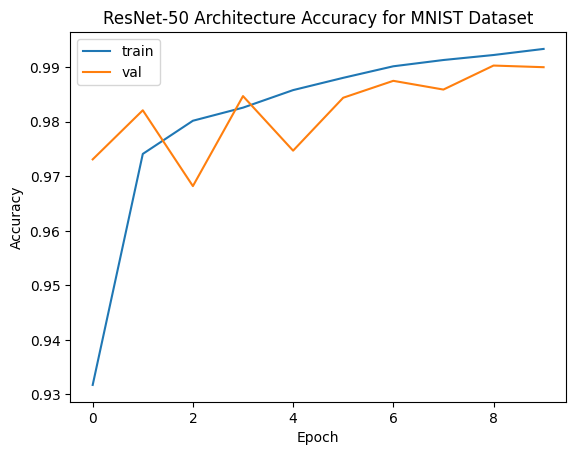

In [ ]:
plt.plot(resnet_mnist_history.history['accuracy'])
plt.plot(resnet_mnist_history.history['val_accuracy'])
plt.title('ResNet-50 Architecture Accuracy for MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

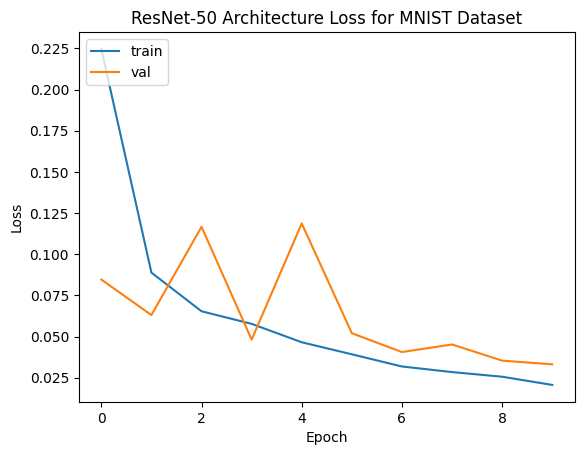

In [ ]:
plt.plot(resnet_mnist_history.history['loss'])
plt.plot(resnet_mnist_history.history['val_loss'])
plt.title('ResNet-50 Architecture Loss for MNIST Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(resnet_mnist_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 99.03 %


In [ ]:
resnet_mnist_cm = confusion_matrix(mnist_yTest, resnet_mnist_perdict)
resnet_mnist_cm

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1124,    1,    0,    3,    2,    2,    0,    2,    1],
       [   3,    0, 1026,    0,    1,    0,    0,    2,    0,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,  970,    0,    2,    0,    0,   10],
       [   2,    0,    0,    6,    0,  879,    2,    0,    1,    2],
       [   5,    0,    0,    0,    0,    0,  953,    0,    0,    0],
       [   0,    3,    7,    1,    5,    0,    0, 1007,    0,    5],
       [   4,    0,    2,    0,    2,    1,    2,    2,  958,    3],
       [   1,    0,    0,    1,    4,    2,    0,    1,    1,  999]])

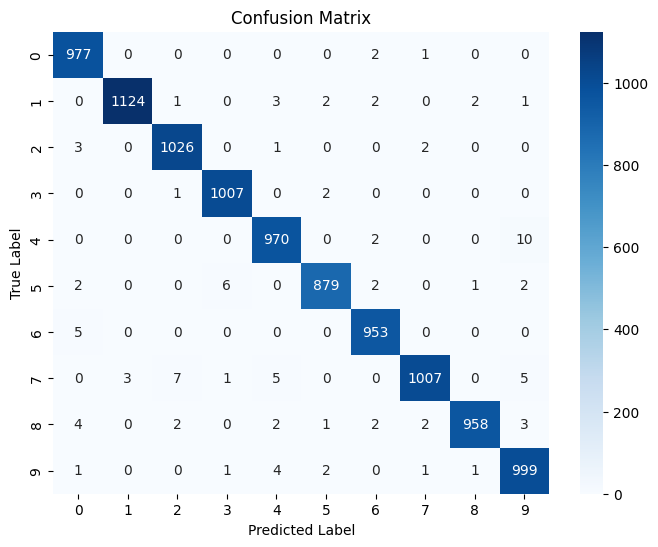

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(resnet_mnist_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(mnist_yTest, resnet_mnist_perdict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Pretrained ResNet-50 on MNIST Dataset

In [ ]:
input_tensor = Input(shape=(28, 28, 3))

pretrainedResnetMnist = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor, input_shape=(32, 32, 3), pooling='avg')

# Freeze the layers of the pre-trained ResNet-50
for layer in pretrainedResnetMnist.layers:
    layer.trainable = False

x = Dense(256, activation='relu')(pretrainedResnetMnist.output)
x = Flatten()(x)
output = Dense(10, activation='softmax')(x)

resnetMnistModel = Model(inputs=input_tensor, outputs=output)

resnetMnistModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnetMnistModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
pretrainedResnetMnistHistory = resnetMnistModel.fit(x_train, mnist_yTrain, epochs=10, validation_data=(x_test, mnist_yTest))

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4129 - accuracy: 0.8717 - val_loss: 0.2784 - val_accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2557 - accuracy: 0.9176 - val_loss: 0.2683 - val_accuracy: 0.9138
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2225 - accuracy: 0.9272 - val_loss: 0.2313 - val_accuracy: 0.9278
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1989 - accuracy: 0.9349 - val_loss: 0.2428 - val_accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1814 - accuracy: 0.9407 - val_loss: 0.2449 - val_accuracy: 0.9239
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1670 - accuracy: 0.9442 - val_loss: 0.2502 - val_accuracy: 0.9234
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1563 - accuracy: 0.9487 - val_loss: 0.2495 -

In [ ]:
resnet_mnist_perdict = resnetMnistModel.predict(x_test)

resnet_mnist_perdict = [np.argmax(arr) for arr in resnet_mnist_perdict]
print(np.array(resnet_mnist_perdict))

313/313 [==============================] - 4s 9ms/step
[7 2 1 ... 4 5 6]


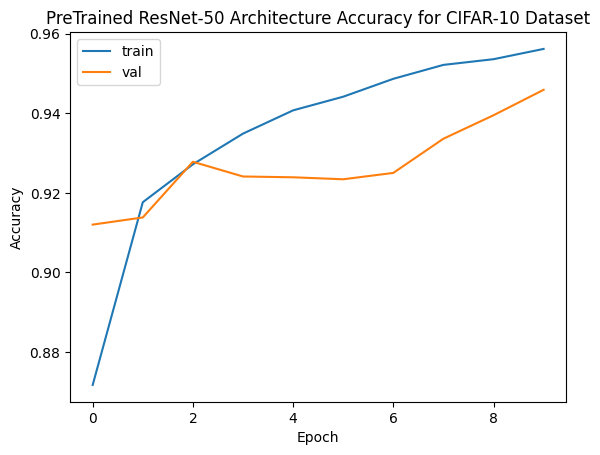

In [ ]:
plt.plot(pretrainedResnetMnistHistory.history['accuracy'])
plt.plot(pretrainedResnetMnistHistory.history['val_accuracy'])
plt.title('PreTrained ResNet-50 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

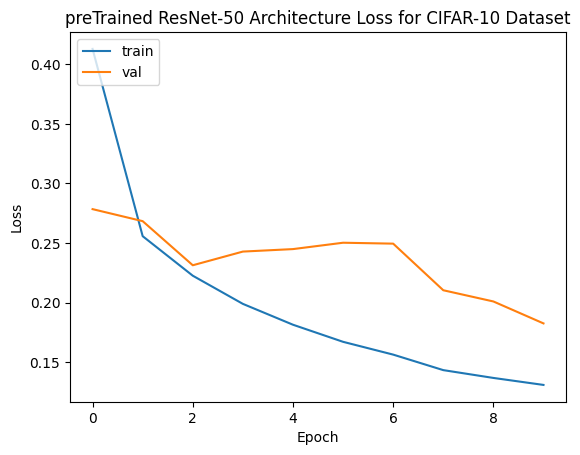

In [ ]:
plt.plot(pretrainedResnetMnistHistory.history['loss'])
plt.plot(pretrainedResnetMnistHistory.history['val_loss'])
plt.title('preTrained ResNet-50 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print('Accuracy Score =',round(np.max(pretrainedResnetMnistHistory.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 94.59 %


# **Conclusion**

- There is overfitting in MNIST dataset because it's simple data compared to ImageNet dataset which the architecture trained on

- To handle overfitting we can decrease number of layers

- ResNet-50 is better than VGG-16 on 2 datasets

- CIFAR10 dataset is better than MNIST because it's larger and contain colored images as is's shape is 32x32x3 but MNIST shape is 28x28x1 and the two architectures trained on colored images (ImageNet Dataset)

- Implementing ResNet50 from scratch require a longer training time

- Using a pretrained model significantly reduces training time since the model has already learned features from a large dataset

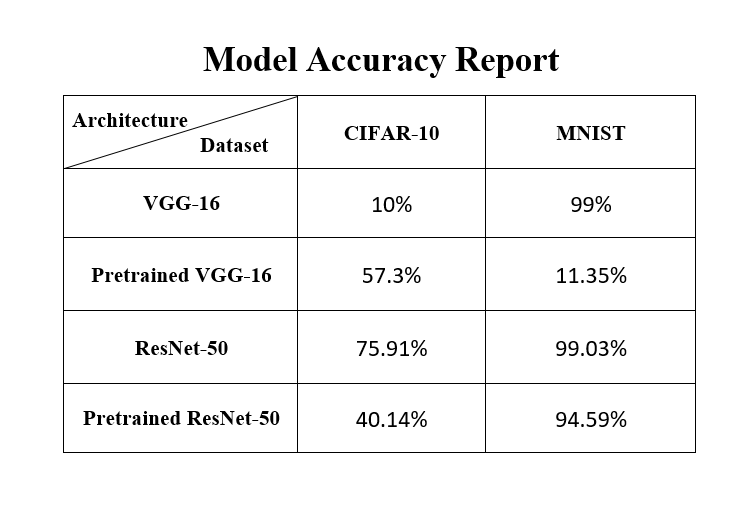

### ResNet-50 Accuracy

In [ ]:
print('ResNet-50 using CIFAR10 Dataset Accuracy Score =',round(np.max(resnet_cifar_history.history['accuracy']) * 100, 2) , '%')
print('Pretrained ResNet-50 using CIFAR10 Dataset Accuracy Score =',round(np.max(pretrainedResnetCifarHistory.history['accuracy']) * 100, 2) , '%')

ResNet-50 using CIFAR10 Dataset Accuracy Score = 87.83 %
Pretrained ResNet-50 using CIFAR10 Dataset Accuracy Score = 39.31 %


In [ ]:
print('ResNet-50 using CIFAR10 Dataset Validation Accuracy Score =',round(np.max(resnet_cifar_history.history['val_accuracy']) * 100, 2) , '%')
print('Pretrained ResNet-50 using CIFAR10 Dataset Validation Accuracy Score =',round(np.max(pretrainedResnetCifarHistory.history['val_accuracy']) * 100, 2) , '%')

ResNet-50 using CIFAR10 Dataset Validation Accuracy Score = 75.91 %
Pretrained ResNet-50 using CIFAR10 Dataset Validation Accuracy Score = 40.14 %


In [ ]:
print('ResNet-50 using MNIST Dataset Accuracy Score =',round(np.max(resnet_mnist_history.history['accuracy']) * 100, 2) , '%')
print('Pretrained ResNet-50 using MNIST Dataset Accuracy Score =',round(np.max(pretrainedResnetMnistHistory.history['accuracy']) * 100, 2) , '%')

ResNet-50 using MNIST Dataset Accuracy Score = 99.34 %
Pretrained ResNet-50 using MNIST Dataset Accuracy Score = 95.62 %


In [ ]:
print('ResNet-50 using MNIST Dataset Validation Accuracy Score =',round(np.max(resnet_mnist_history.history['val_accuracy']) * 100, 2) , '%')
print('Pretrained ResNet-50 using MNIST Dataset Validation Accuracy Score',round(np.max(pretrainedResnetMnistHistory.history['val_accuracy']) * 100, 2) , '%')

ResNet-50 using MNIST Dataset Validation Accuracy Score = 99.03 %
Pretrained ResNet-50 using MNIST Dataset Validation Accuracy Score 94.59 %


### VGG-16 Accuracy

In [ ]:
print('VGG-16 using CIFAR10 Dataset Accuracy Score =',round(np.max(vgg_cifar_history.history['accuracy']) * 100, 2) , '%')
print('Pretrained VGG-16 on CIAR10 Dataset Accuracy Score =',round(np.max(pretrainedVggCifarHistory.history['accuracy']) * 100, 2) , '%')
print('\nVGG-16 using MNIST Dataset Accuracy Score =',round(np.max(vgg_mnist_history.history['accuracy']) * 100, 2) , '%')
print('Pretrained VGG-16 on MNIST Dataset Accuracy Score =',round(np.max(pre_vgg_history.history['accuracy']) * 100, 2) , '%')

VGG-16 using CIFAR10 Dataset Accuracy Score = 9.97 %
Pretrained VGG-16 on CIAR10 Dataset Accuracy Score = 91.3 %

VGG-16 using MNIST Dataset Accuracy Score = 98.89 %


In [ ]:
print('Pretrained VGG-16 on MNIST Dataset Accuracy Score =',round(np.max(pre_vgg_history.history['accuracy']) * 100, 2) , '%')

Pretrained VGG-16 on MNIST Dataset Accuracy Score = 11.24 %


In [ ]:
print('VGG-16 using CIFAR10 Dataset Validation Accuracy Score =',round(np.max(vgg_cifar_history.history['val_accuracy']) * 100, 2) , '%')
print('Pretrained VGG-16 on CIAR10 Dataset Validation Accuracy Score =',round(np.max(pretrainedVggCifarHistory.history['val_accuracy']) * 100, 2) , '%')
print('\nVGG-16 using MNIST Dataset Validation Accuracy Score =',round(np.max(vgg_mnist_history.history['val_accuracy']) * 100, 2) , '%')
print('Pretrained VGG-16 on MNIST Dataset Validation Accuracy Score =',round(np.max(pre_vgg_history.history['val_accuracy']) * 100, 2) , '%')

VGG-16 using CIFAR10 Dataset Validation Accuracy Score = 10.0 %
Pretrained VGG-16 on CIAR10 Dataset Validation Accuracy Score = 57.3 %

VGG-16 using MNIST Dataset Validation Accuracy Score = 99.0 %


In [ ]:
print('Pretrained VGG-16 on MNIST Dataset Validation Accuracy Score =',round(np.max(pre_vgg_history.history['val_accuracy']) * 100, 2) , '%')

Pretrained VGG-16 on MNIST Dataset Validation Accuracy Score = 11.35 %
